In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

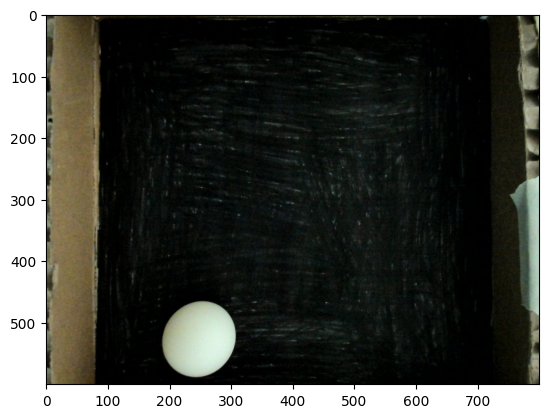

In [10]:
img_bgr = cv2.imread("images/ball_on_plate.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

# Parameter für Ballverfolgung
crop = 50
bbox = 120
ball = None
last_detection_time = 0
last_roi = None  
roi_reset_time = 0.5 

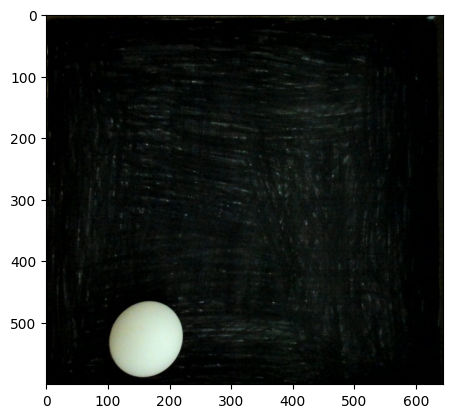

In [11]:
crop_top, crop_left = 0, 86
crop_bottom, crop_right = 0, 70
img = img_rgb[crop_top:img_rgb.shape[0] - crop_bottom, crop_left:img_rgb.shape[1] - crop_right]

plt.imshow(img)
plt.show()

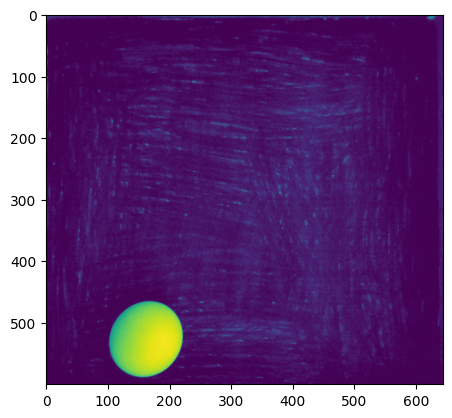

In [16]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

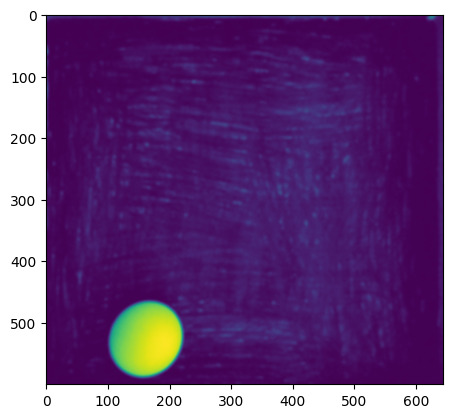

In [17]:
img_gray_blur = cv2.GaussianBlur(img_gray, (9, 9), 2)

plt.imshow(img_gray_blur)
plt.show()

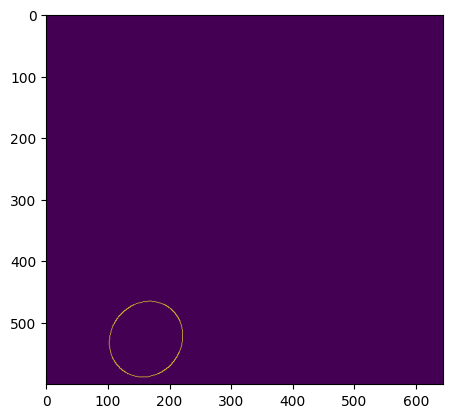

In [19]:
edges = cv2.Canny(img_gray_blur, 100, 200)

plt.imshow(edges)
plt.show()

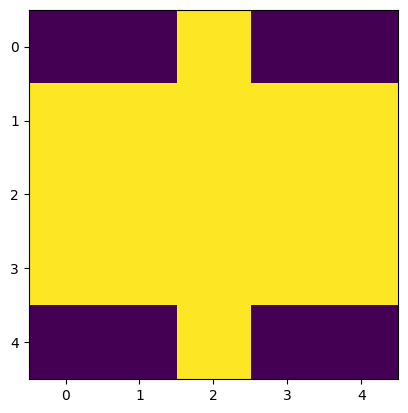

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

plt.imshow(kernel)
plt.show()

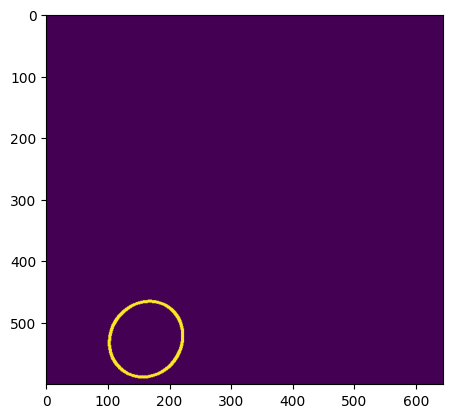

In [21]:
edges_enhanced = cv2.dilate(edges, kernel, iterations=1)

plt.imshow(edges_enhanced)
plt.show()

In [25]:
contours, _ = cv2.findContours(edges_enhanced, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Contours: {len(contours)}")

largest_contour = max(contours, key=cv2.contourArea)

print(f"largest_contour: {largest_contour}")
print(f"largest_contour_length: {len(largest_contour)}")

Contours: 1
largest_contour: [[[165 463]]

 [[164 464]]

 [[157 464]]

 [[156 465]]

 [[153 465]]

 [[152 466]]

 [[149 466]]

 [[148 467]]

 [[146 467]]

 [[145 468]]

 [[144 468]]

 [[143 469]]

 [[141 469]]

 [[140 470]]

 [[139 470]]

 [[138 471]]

 [[137 471]]

 [[136 472]]

 [[135 472]]

 [[133 474]]

 [[132 474]]

 [[130 476]]

 [[129 476]]

 [[126 479]]

 [[125 479]]

 [[115 489]]

 [[115 490]]

 [[112 493]]

 [[112 494]]

 [[110 496]]

 [[110 497]]

 [[109 498]]

 [[109 499]]

 [[108 500]]

 [[108 501]]

 [[106 503]]

 [[106 505]]

 [[105 506]]

 [[105 508]]

 [[104 509]]

 [[104 511]]

 [[103 512]]

 [[103 515]]

 [[102 516]]

 [[102 519]]

 [[101 520]]

 [[101 527]]

 [[100 528]]

 [[100 538]]

 [[101 539]]

 [[101 544]]

 [[102 545]]

 [[102 549]]

 [[103 550]]

 [[103 552]]

 [[104 553]]

 [[104 555]]

 [[105 556]]

 [[105 558]]

 [[106 559]]

 [[106 560]]

 [[108 562]]

 [[108 563]]

 [[109 564]]

 [[109 565]]

 [[111 567]]

 [[111 568]]

 [[117 574]]

 [[117 575]]

 [[11